In [1]:
# Import dependencies
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
# Import csv files as dataframes
dota_csv = "Resources/dota2ti_668618.csv"
dota_df = pd.read_csv(dota_csv,)

# Delete video index column
del dota_df['Unnamed: 0']

# Convert duration to seconds
dota_df['duration'] = pd.to_timedelta(dota_df['duration'])
dota_df['duration(s)'] = dota_df['duration'].astype('timedelta64[s]')
dota_df['published_at'] = pd.to_datetime(dota_df['published_at'])

dota_df.dtypes

title                        object
published_at    datetime64[ns, UTC]
view_count                    int64
duration            timedelta64[ns]
duration(s)                 float64
dtype: object

In [3]:

# Add columns for player count by years
start_date_15 = '2015-01-01'
end_date_15 = '2015-12-31'
mask_15 = (dota_df['published_at'] > start_date_15) & (dota_df['published_at'] <= end_date_15)
dota_2015 = dota_df.loc[mask_15].assign(player_count = 933942)

start_date_16 = '2016-01-01'
end_date_16 = '2016-12-31'
mask_16 = (dota_df['published_at'] > start_date_16) & (dota_df['published_at'] <= end_date_16)
dota_2016 = dota_df.loc[mask_16].assign(player_count = 1117519)

start_date_17 = '2017-01-01'
end_date_17 = '2017-12-31'
mask_17 = (dota_df['published_at'] > start_date_17) & (dota_df['published_at'] <= end_date_17)
dota_2017 = dota_df.loc[mask_17].assign(player_count = 876395)

start_date_18 = '2018-01-01'
end_date_18 = '2018-12-31'
mask_18 = (dota_df['published_at'] > start_date_18) & (dota_df['published_at'] <= end_date_18)
dota_2018 = dota_df.loc[mask_18].assign(player_count = 829281)

start_date_19 = '2019-01-01'
end_date_19 = '2019-12-31'
mask_19 = (dota_df['published_at'] > start_date_19) & (dota_df['published_at'] <= end_date_19)
dota_2019 = dota_df.loc[mask_19].assign(player_count = 826690)

start_date_20 = '2020-01-01'
end_date_20 = '2020-12-31'
mask_20 = (dota_df['published_at'] > start_date_20) & (dota_df['published_at'] <= end_date_20)
dota_2020 = dota_df.loc[mask_20].assign(player_count = 663812)

# Clean up dataframe
dota_merged = pd.concat([dota_2020, dota_2019, dota_2018, dota_2017, dota_2016, dota_2015], ignore_index=True)
dota_merged

,title,published_at,view_count,duration,duration(s),player_count
0,True Sight: The International 2019 Grand Finals,2020-01-28 17:50:14+00:00,82511,02:40:32,9632.0,663812
1,[EN] Late Game - The International 9 - Main Ev...,2020-01-16 20:03:30+00:00,14252,00:03:01,181.0,663812
2,[EN] Late Game - The International 2019 - Main...,2019-08-25 14:48:11+00:00,11366,00:44:41,2681.0,826690
3,[EN] The International 2019 Main Event Day 6,2019-08-25 13:25:17+00:00,18625,09:53:56,35636.0,826690
4,[EN] OG vs Liquid BO5 - The International 2019...,2019-08-25 13:22:29+00:00,12574,04:46:18,17178.0,826690
...,...,...,...,...,...,...
195,Evil Geniuses vs. EHOME - Game 2 - The Interna...,2015-08-05 17:04:56.470014+00:00,1874,00:44:25,2665.0,933942
196,LGD vs. CDEC - Game 2 - The International 2015...,2015-08-05 17:04:56.470014+00:00,746,00:46:47,2807.0,933942
197,LGD vs. CDEC - Game 1 - The International 2015...,2015-08-05 17:04:56.470014+00:00,850,00:51:28,3088.0,933942
198,Team Secret vs Invictus Gaming - Game 3 - The ...,2015-08-05 17:04:56.470014+00:00,1581,00:57:55,3475.0,933942


In [4]:
# Repeat for CS:GO
# Import csv files as dataframes
csgo_csv = "Resources/ESL_CSGO_4588446.csv"
csgo_df = pd.read_csv(csgo_csv,)

# Delete video index column
del csgo_df['Unnamed: 0']

# Convert duration to seconds
csgo_df['duration'] = pd.to_timedelta(csgo_df['duration'])
csgo_df['duration(s)'] = csgo_df['duration'].astype('timedelta64[s]')
#csgo_df['published_at'] = pd.to_datetime(csgo_df['published_at'])

csgo_df.dtypes

title                    object
published_at             object
view_count                int64
duration        timedelta64[ns]
duration(s)             float64
dtype: object

In [5]:
# Add columns for player count by years
start_date_17 = '2017-01-01'
end_date_17 = '2017-12-31'
mask_17 = (csgo_df['published_at'] > start_date_17) & (csgo_df['published_at'] <= end_date_17)
csgo_2017 = csgo_df.loc[mask_17].assign(player_count = 639968)

start_date_18 = '2018-01-01'
end_date_18 = '2018-12-31'
mask_18 = (csgo_df['published_at'] > start_date_18) & (csgo_df['published_at'] <= end_date_18)
csgo_2018 = csgo_df.loc[mask_18].assign(player_count = 583029)

start_date_19 = '2019-01-01'
end_date_19 = '2019-12-31'
mask_19 = (csgo_df['published_at'] > start_date_19) & (csgo_df['published_at'] <= end_date_19)
csgo_2019 = csgo_df.loc[mask_19].assign(player_count = 747937)

start_date_20 = '2020-01-01'
end_date_20 = '2020-12-31'
mask_20 = (csgo_df['published_at'] > start_date_20) & (csgo_df['published_at'] <= end_date_20)
csgo_2020 = csgo_df.loc[mask_20].assign(player_count = 1193359)

start_date_21 = '2021-01-01'
end_date_21 = '2021-12-31'
mask_21 = (csgo_df['published_at'] > start_date_21) & (csgo_df['published_at'] <= end_date_21)
csgo_2021 = csgo_df.loc[mask_21].assign(player_count = 1198581)

# Clean up dataframe
csgo_merged = pd.concat([csgo_2021, csgo_2020, csgo_2019, csgo_2018, csgo_2017], ignore_index=True)
csgo_merged

,title,published_at,view_count,duration,duration(s),player_count
0,CS:GO - Endpoint vs. Fnatic [Overpass] Map 2 -...,2021-03-26T13:20:53Z,10,01:02:30,3750.0,1198581
1,CS:GO - Endpoint vs. Fnatic [Inferno] Map 1 - ...,2021-03-26T12:03:33Z,19,00:57:44,3464.0,1198581
2,LIVE: Endpoint CeX vs Fnatic - ESL Pro League ...,2021-03-26T10:01:39Z,419,03:59:28,14368.0,1198581
3,RERUN: Virtus.pro vs. Endpoint [Inferno] Map 1...,2021-03-25T21:47:25Z,165501,12:11:41,43901.0,1198581
4,CS:GO - Astralis vs. Evil Geniuses [Inferno] M...,2021-03-25T21:38:49Z,1043,00:55:37,3337.0,1198581
...,...,...,...,...,...,...
4283,Radix Esports vs Reason Gaming Week 7 ESL Prem...,2017-10-19T13:26:40Z,6,00:39:26,2366.0,639968
4284,Radix Esports vs CeX Week 6 ESL Premiership Au...,2017-10-19T13:18:42Z,12,00:43:16,2596.0,639968
4285,fish123 vs Endpoint Week 6 ESL Premiership Aut...,2017-10-19T13:15:21Z,9,00:49:01,2941.0,639968
4286,Team Descend vs Reason Gaming Week 6 ESL Premi...,2017-10-19T13:07:07Z,9,00:36:30,2190.0,639968


In [6]:
# Repeat for Fortnite
# Import csv files as dataframes
fortnite_csv = "Resources/Fortnite_4151080.csv"
fortnite_df = pd.read_csv(fortnite_csv,)

# Delete video index column
del fortnite_df['Unnamed: 0']

# Convert duration to seconds
fortnite_df['duration'] = pd.to_timedelta(fortnite_df['duration'])
fortnite_df['duration(s)'] = fortnite_df['duration'].astype('timedelta64[s]')
fortnite_df['published_at'] = pd.to_datetime(fortnite_df['published_at'])

# Add columns for player count by years
start_date_17 = '2017-01-01'
end_date_17 = '2017-12-31'
mask_17 = (fortnite_df['published_at'] > start_date_17) & (fortnite_df['published_at'] <= end_date_17)
fortnite_2017 = fortnite_df.loc[mask_17].assign(player_count = 1000000)

start_date_18 = '2018-01-01'
end_date_18 = '2018-12-31'
mask_18 = (fortnite_df['published_at'] > start_date_18) & (fortnite_df['published_at'] <= end_date_18)
fortnite_2018 = fortnite_df.loc[mask_18].assign(player_count = 8300000)

start_date_19 = '2019-01-01'
end_date_19 = '2019-12-31'
mask_19 = (fortnite_df['published_at'] > start_date_19) & (fortnite_df['published_at'] <= end_date_19)
fortnite_2019 = fortnite_df.loc[mask_19].assign(player_count = 7154154)

start_date_20 = '2020-01-01'
end_date_20 = '2020-12-31'
mask_20 = (fortnite_df['published_at'] > start_date_20) & (fortnite_df['published_at'] <= end_date_20)
fortnite_2020 = fortnite_df.loc[mask_20].assign(player_count = 15619534)

start_date_21 = '2021-01-01'
end_date_21 = '2021-12-31'
mask_21 = (fortnite_df['published_at'] > start_date_21) & (fortnite_df['published_at'] <= end_date_21)
fortnite_2021 = fortnite_df.loc[mask_21].assign(player_count = 25115476)

# Clean up dataframe
fortnite_merged = pd.concat([fortnite_2021, fortnite_2020, fortnite_2019, fortnite_2018, fortnite_2017], ignore_index=True)
fortnite_merged


,title,published_at,view_count,duration,duration(s),player_count
0,FNCS C2 S5 Finals!,2021-03-15 04:48:03+00:00,111804,00:31:58,1918.0,25115476
1,FNCS C2 S5 Finals!,2021-03-14 21:50:06+00:00,1041138,06:57:09,25029.0,25115476
2,FNCS C2 S5 Finals!,2021-03-14 20:20:32+00:00,251889,01:08:27,4107.0,25115476
3,FNCS C2 S5 Finals!,2021-03-14 19:22:45+00:00,202902,00:57:37,3457.0,25115476
4,FNCS C2 S5 Finals!,2021-03-14 17:50:15+00:00,377164,01:32:17,5537.0,25115476
...,...,...,...,...,...,...
210,"Fortnite Community Team Stream // Fridays, 4:0...",2017-10-20 20:22:10+00:00,6148,01:16:32,4592.0,1000000
211,Horde Bash Dev Stream - 10/4,2017-10-04 20:02:16+00:00,3798,01:15:04,4504.0,1000000
212,Survive the Storm Dev Stream - August 28,2017-08-28 20:01:01+00:00,4728,02:04:51,7491.0,1000000
213,Community Team Stream - August 2,2017-08-02 19:11:56+00:00,2453,01:49:10,6550.0,1000000


In [7]:
# Repeat for League of Legends
# Import csv files as dataframes
lol_csv = "Resources/LCS_1460711.csv"
lol_df = pd.read_csv(lol_csv,)

# Delete video index column
del lol_df['Unnamed: 0']

# Convert duration to seconds
lol_df['duration'] = pd.to_timedelta(lol_df['duration'])
lol_df['duration(s)'] = lol_df['duration'].astype('timedelta64[s]')
lol_df['published_at'] = pd.to_datetime(lol_df['published_at'])

# Add columns for player count by years
start_date_17 = '2017-01-01'
end_date_17 = '2017-12-31'
mask_17 = (lol_df['published_at'] > start_date_17) & (lol_df['published_at'] <= end_date_17)
lol_2017 = lol_df.loc[mask_17].assign(player_count = 3333333)

start_date_18 = '2018-01-01'
end_date_18 = '2018-12-31'
mask_18 = (lol_df['published_at'] > start_date_18) & (lol_df['published_at'] <= end_date_18)
lol_2018 = lol_df.loc[mask_18].assign(player_count = 2500000)

start_date_19 = '2019-01-01'
end_date_19 = '2019-12-31'
mask_19 = (lol_df['published_at'] > start_date_19) & (lol_df['published_at'] <= end_date_19)
lol_2019 = lol_df.loc[mask_19].assign(player_count = 2733333)

start_date_20 = '2020-01-01'
end_date_20 = '2020-12-31'
mask_20 = (lol_df['published_at'] > start_date_20) & (lol_df['published_at'] <= end_date_20)
lol_2020 = lol_df.loc[mask_20].assign(player_count = 3666666)


# Clean up dataframe
lol_merged = pd.concat([lol_2020, lol_2019, lol_2018, lol_2017], ignore_index=True)
lol_merged

,title,published_at,view_count,duration,duration(s),player_count
0,(REBROADCAST) G2 vs. FNC | Finals | LEC Summer...,2020-11-14 20:33:36+00:00,179406,05:37:56,20276.0,3666666
1,LCS Playoffs Grand Finals: FLY vs. TSM,2020-09-06 18:00:52+00:00,3317504,09:05:30,32730.0,3666666
2,(REBROADCAST) TL vs. TSM | Semifinals | LCS Su...,2020-09-06 08:02:11+00:00,184857,06:07:50,22070.0,3666666
3,LCS Playoffs Semifinals: TL vs. TSM,2020-09-05 18:38:02+00:00,2247652,06:57:07,25027.0,3666666
4,2020 Summer Finals Virtual Tailgate Showmatch,2020-09-05 00:01:14+00:00,193952,02:45:15,9915.0,3666666
...,...,...,...,...,...,...
136,TSM vs. IMT | Final | NA LCS Summer Split | TS...,2017-09-03 18:02:04+00:00,82924,05:36:40,20200.0,3333333
137,DIG vs. CLG | Third Place | NA LCS Summer Spli...,2017-09-02 18:00:54+00:00,17036,05:01:43,18103.0,3333333
138,"The Dive! - LIVE with Jatt, Kobe and Azael",2017-08-30 21:00:35+00:00,2074,02:09:32,7772.0,3333333
139,NA LCS Semifinals: TSM vs. Team Dignitas,2017-08-27 18:05:27+00:00,35838,05:36:43,20203.0,3333333


In [8]:
# Repeat for Overwatch
# Import csv files as dataframes
overwatch_csv = "Resources/OverwatchLeague_1783807.csv"
overwatch_df = pd.read_csv(overwatch_csv,)

# Delete video index column
del overwatch_df['Unnamed: 0']

# Convert duration to seconds
overwatch_df['duration'] = pd.to_timedelta(overwatch_df['duration'])
overwatch_df['duration(s)'] = overwatch_df['duration'].astype('timedelta64[s]')
overwatch_df['published_at'] = pd.to_datetime(lol_df['published_at'])

# Add columns for player count by years
start_date_18 = '2018-01-01'
end_date_18 = '2018-12-31'
mask_18 = (overwatch_df['published_at'] > start_date_18) & (overwatch_df['published_at'] <= end_date_18)
overwatch_2018 = overwatch_df.loc[mask_18].assign(player_count = 8000000)

start_date_19 = '2019-01-01'
end_date_19 = '2019-12-31'
mask_19 = (overwatch_df['published_at'] > start_date_19) & (overwatch_df['published_at'] <= end_date_19)
overwatch_2019 = overwatch_df.loc[mask_19].assign(player_count = 12000000)

# Clean up dataframe
overwatch_merged = pd.concat([overwatch_2019, overwatch_2018], ignore_index=True)
overwatch_merged

,title,published_at,view_count,duration,duration(s),player_count
0,Game 2 SHD @ LDN | Play-ins Week 1,2019-09-08 17:46:49+00:00,444,00:11:10,670.0,12000000
1,Game 1 SHD @ LDN | Play-ins Week 1,2019-09-07 17:46:01+00:00,575,00:18:29,1109.0,12000000
2,Watchpoint: Preshow 2019 | Play-in | Week 1 Day 2,2019-08-24 18:31:36+00:00,168,00:27:08,1628.0,12000000
3,ReWatch | 2019 Season | Play-in Tournament | D...,2019-03-30 19:51:51+00:00,40641,07:31:57,27117.0,12000000
4,Watchpoint: Postshow 2019 | Play-in | Week 1 D...,2019-03-16 19:31:27+00:00,321,00:27:28,1648.0,12000000
5,Game 7 SHD @ PHI | Play-ins Week 1,2018-09-15 19:31:48+00:00,783,00:33:47,2027.0,8000000
6,Full Match | Shanghai Dragons vs. Philadelphia...,2018-09-14 21:14:44+00:00,7085,03:23:00,12180.0,8000000
7,Game 6 SHD @ PHI | Play-ins Week 1,2018-09-14 20:24:22+00:00,415,00:22:43,1363.0,8000000
8,Game 5 SHD @ PHI | Play-ins Week 1,2018-09-14 20:22:10+00:00,404,00:18:03,1083.0,8000000
9,Game 4 SHD @ PHI | Play-ins Week 1,2018-06-16 19:32:02+00:00,426,00:24:26,1466.0,8000000


In [9]:
# Combine the dataframes
total_merged = pd.concat([dota_merged, csgo_merged, fortnite_merged, lol_merged, overwatch_merged], ignore_index=True)
total_merged

,title,published_at,view_count,duration,duration(s),player_count
0,True Sight: The International 2019 Grand Finals,2020-01-28 17:50:14+00:00,82511,02:40:32,9632.0,663812
1,[EN] Late Game - The International 9 - Main Ev...,2020-01-16 20:03:30+00:00,14252,00:03:01,181.0,663812
2,[EN] Late Game - The International 2019 - Main...,2019-08-25 14:48:11+00:00,11366,00:44:41,2681.0,826690
3,[EN] The International 2019 Main Event Day 6,2019-08-25 13:25:17+00:00,18625,09:53:56,35636.0,826690
4,[EN] OG vs Liquid BO5 - The International 2019...,2019-08-25 13:22:29+00:00,12574,04:46:18,17178.0,826690
...,...,...,...,...,...,...
4865,Watchpoint: Postshow 2019 | Stage 4 Week 5 Day 2,2018-02-17 20:30:29+00:00,5498,00:27:48,1668.0,8000000
4866,Full Match | San Francisco Shock vs. Los Angel...,2018-02-10 20:30:31+00:00,5238,01:37:13,5833.0,8000000
4867,Game 4 SFS @ VAL | Stage 4 Week 5,2018-02-03 20:30:49+00:00,537,00:24:17,1457.0,8000000
4868,Game 3 SFS @ VAL | Stage 4 Week 5,2018-01-27 20:32:18+00:00,396,00:18:28,1108.0,8000000


In [12]:
# Split data into training and testing
X = total_merged[["duration(s)", "player_count"]]
y = total_merged["view_count"].values.reshape(-1,1)
print(X.shape, y.shape)

(4870, 2) (4870, 1)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
# Create a regression model
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.06716944415761328
Testing Score: 0.040972515040507584


Text(0.5, 1.0, 'Residual Plot')

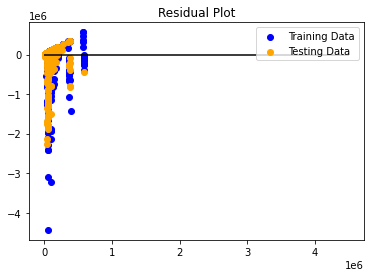

In [16]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

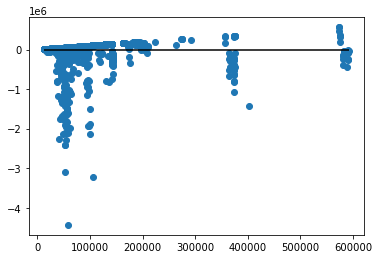

In [17]:
# Plot datasets 
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [18]:
# Test model for MSE
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 61012258456.066, R2: 0.040972515040507584
